# Aircraft Risk Analysis

## Business Understanding

To successfully expand in the area of aviation for both commercial and private uses, the company must mitigate potential risks of aircrafts. In doing so the company can make strategic and informative decisions on what to apply their attention to in order to have a successful practice in aviation, but more importantly keep our clients safe.

## Data Understanding

A dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. Every aircraft in the data has an ID number to reference and includes information such as Make, Model, weather, purpose of flight and severity of injuries as an outcome.

## Data Preparation

The approach to the dataset is to focus on the accidents that occured after the year 2000, then specifically investigate the  make and models of airplanes and compare them on how many fatal injuries there are in each model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [3]:
# Creating a copy of df to work with
df_copy = df.copy()

# Changing 'Event.Date' format
df_copy['Event.Date'] = pd.to_datetime(df_copy['Event.Date'])

# Filtering rows with years 2000 or greater
df_copy = df_copy[df_copy['Event.Date'].dt.year >= 2000]

# Select rows with "Airplane" in 'Aircraft Category' column
df_copy = df_copy.loc[df_copy['Aircraft.Category'] == 'Airplane']

# Cleaning 'Total.Fatal.Injuries' column name
df_copy.rename(columns={'Total.Fatal.Injuries': 'Total Fatal Injuries'}, inplace=True)

# Dropping Nans in 'Total Fatal Injuries'
mask = ~df_copy['Total Fatal Injuries'].isna()
df_copy = df_copy.loc[mask]


# Create a new DataFrame with selected columns
new_df = df_copy[['Make', 'Model', 'Total Fatal Injuries']].copy()

In [4]:
new_df.head()

,Make,Model,Total Fatal Injuries
47779,Airbus Industrie,A 310,169.0
47864,Cessna,208B,1.0
47869,Cessna,182M,1.0
47870,Douglas,DC-8-71F,3.0
48128,Learjet,35A,3.0


In [5]:
# Checking values in the 'Make' column
new_df['Make'].value_counts()

CESSNA                       4867
PIPER                        2805
Cessna                       1099
BOEING                       1037
BEECH                        1018
                             ... 
Nichols Rans, Inc.              1
Omf                             1
EXTRA FLUGZEUGBAU               1
PARADISE AIRCRAFT USA LLC       1
HUNZIKER                        1
Name: Make, Length: 3337, dtype: int64

In [6]:
# Apply name changes using .replace and assign the result back to 'Make' column
name_changes = {'CESSNA': 'Cessna', 'PIPER': 'Piper', 'BEECH': 'Beech','CIRRUS DESIGN CORP':'Cirrus Design Corp',
 'BOEING': 'Boeing','MOONEY': 'Mooney','BELLANCA':'Bellanca','AERONCA':'Aeronca',
 'EMBRAER':'Embraer','MAULE':'Maule','AIRBUS':'Airbus','AIR TRACTOR INC':'Air Tractor', 'LUSCOMBE':'Luscombe',
 'DEHAVILLAND':'Dehavilland'}

# Applying name changes 
new_df.loc[:, 'Make'] = new_df['Make'].replace(name_changes)

In [7]:
# Checking name changes
new_df['Make'].value_counts()

Cessna                       5966
Piper                        3457
Beech                        1276
Boeing                       1146
Mooney                        306
                             ... 
Omf                             1
EXTRA FLUGZEUGBAU               1
PARADISE AIRCRAFT USA LLC       1
SAPP LARRY E                    1
HUNZIKER                        1
Name: Make, Length: 3323, dtype: int64

In [8]:
# Taking values with at least 100 make counts
counts = new_df['Make'].value_counts()
new_df = new_df[new_df['Make'].isin(counts[counts >= 100].index)] 

In [9]:
new_df['Make'].value_counts()

Cessna                5966
Piper                 3457
Beech                 1276
Boeing                1146
Mooney                 306
Air Tractor            291
Airbus                 238
Cirrus Design Corp     220
Bellanca               179
Maule                  172
Aeronca                168
Embraer                143
Luscombe               115
Name: Make, dtype: int64

In [10]:
# Taking values with at least 100 model counts
model_counts = new_df['Model'].value_counts()
new_df = new_df[new_df['Model'].isin(model_counts[model_counts >= 100].index)]

In [11]:
new_df['Model'].value_counts()

172          718
737          402
182          278
PA28         273
152          238
172S         200
180          181
172N         175
150          161
A36          149
172M         147
SR22         144
PA-18-150    141
PA-28-140    133
140          104
172P         101
Name: Model, dtype: int64

In [12]:
new_df.head(20)


,Make,Model,Total Fatal Injuries
50364,Cessna,182,4.0
50561,Cessna,182,2.0
51292,Cessna,150,2.0
52291,Cessna,152,2.0
52532,Cessna,172,4.0
53819,Cessna,152,1.0
54329,Cessna,172S,2.0
54877,Cessna,172N,5.0
55307,Piper,PA-28-140,1.0
55965,Piper,PA-28-140,1.0


## Exploratory Data Analysis

In [13]:
# Grouping by Make and Model and Aggregating
filtered_df = new_df.groupby(['Make', 'Model']).agg({'Total Fatal Injuries': 'sum', 'Make': 'count'})

# Rename the 'Make' column to 'Total Accidents'
filtered_df = filtered_df.rename(columns={'Make': 'Total Accidents'})

# Reset index to make 'Make' and 'Model' columns regular columns
filtered_df = filtered_df.reset_index()

# Rearranging Columns
filtered_df = filtered_df[['Make', 'Model', 'Total Accidents', 'Total Fatal Injuries']]

# Creating a new column 'Safety Ratio'. Total Fatal Injuries / Total Accidents
filtered_df['Safety Ratio'] = filtered_df['Total Fatal Injuries'] / filtered_df['Total Accidents']
filtered_df


,Make,Model,Total Accidents,Total Fatal Injuries,Safety Ratio
0,Beech,A36,149,111.0,0.744966
1,Boeing,737,402,1341.0,3.335821
2,Cessna,140,103,17.0,0.165049
3,Cessna,150,161,59.0,0.366460
4,Cessna,152,238,45.0,0.189076
5,Cessna,172,718,213.0,0.296657
6,Cessna,172M,147,44.0,0.299320
7,Cessna,172N,175,68.0,0.388571
8,Cessna,172P,101,11.0,0.108911
9,Cessna,172S,200,48.0,0.240000


In [14]:
#Dropping Embraer since it does model does not follow >= 100 flights
filtered_df = filtered_df[filtered_df['Make'] != 'Embraer']

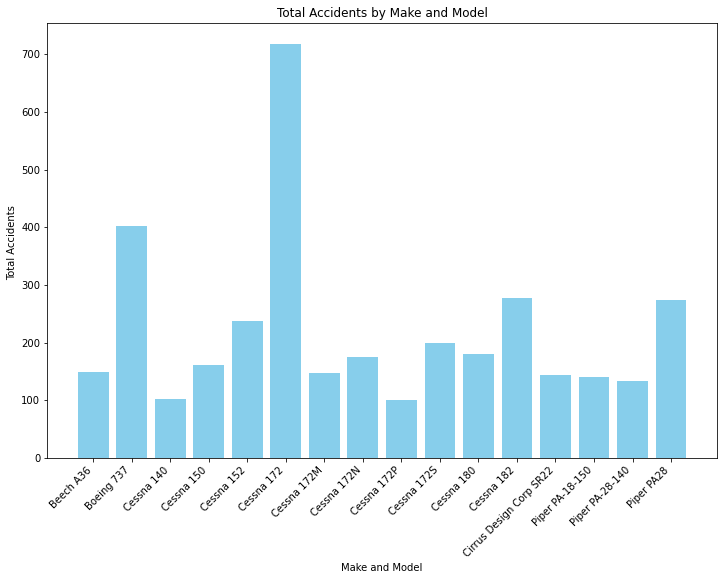

In [15]:
# Bar chart for 'Total Accidents by Make and Model'

plt.figure(figsize=(12, 8))
plt.bar(filtered_df['Make'] + ' ' + filtered_df['Model'], filtered_df['Total Accidents'], color='skyblue')
plt.xlabel('Make and Model')
plt.ylabel('Total Accidents ')
plt.title('Total Accidents by Make and Model')
plt.xticks(rotation=45, ha='right');

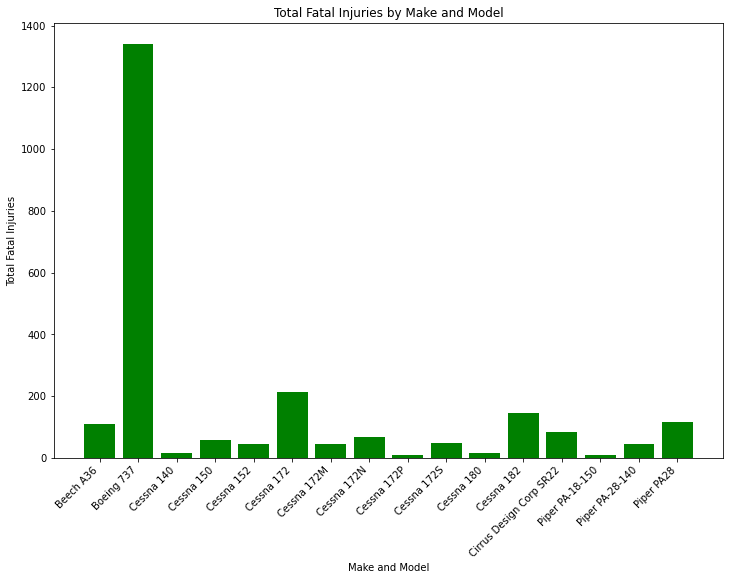

In [16]:
# Bar chart for 'Total Fatal Injuries by Make and Model'

plt.figure(figsize=(12, 8))
plt.bar(filtered_df['Make'] + ' ' + filtered_df['Model'], filtered_df['Total Fatal Injuries'], color='green')
plt.xlabel('Make and Model')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Make and Model')
plt.xticks(rotation=45, ha='right');

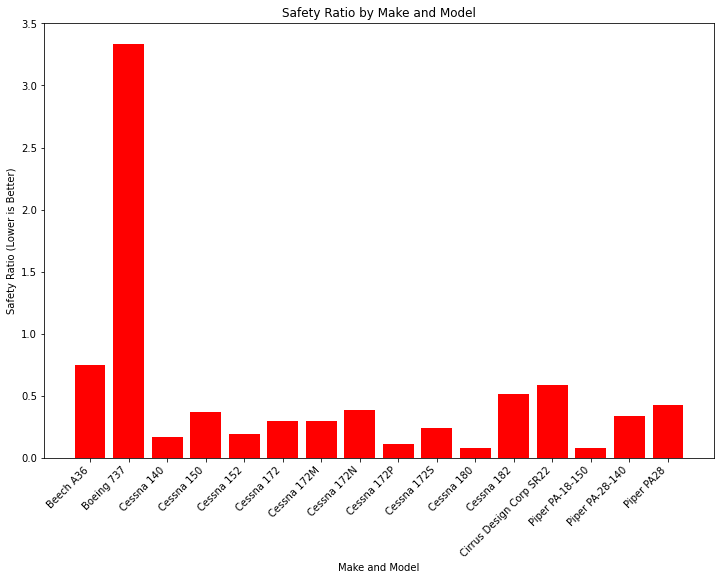

In [17]:
# Bar chart for 'Safety Ratio by Make and Model'

plt.figure(figsize=(12, 8))
plt.bar(filtered_df['Make'] + ' ' + filtered_df['Model'], filtered_df['Safety Ratio'], color='red')
plt.xlabel('Make and Model')
plt.ylabel('Safety Ratio (Lower is Better)')
plt.title('Safety Ratio by Make and Model')
plt.xticks(rotation=45, ha='right');

In [18]:
sorted_df = filtered_df.sort_values(by='Safety Ratio')
top_three_safest = sorted_df.head(3)
top_three_safest

,Make,Model,Total Accidents,Total Fatal Injuries,Safety Ratio
14,Piper,PA-18-150,141,11.0,0.078014
10,Cessna,180,181,15.0,0.082873
8,Cessna,172P,101,11.0,0.108911


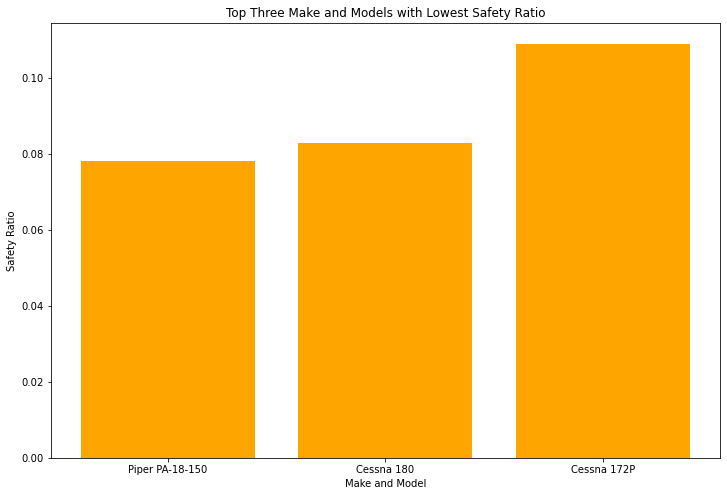

In [19]:
# Bar chart for Top 3 safest Make and model
plt.figure(figsize=(12, 8))
plt.bar(top_three_safest['Make'] + ' ' + top_three_safest['Model'], top_three_safest['Safety Ratio'], color='orange')
plt.xlabel('Make and Model')
plt.ylabel('Safety Ratio')
plt.title('Top Three Make and Models with Lowest Safety Ratio');

# Conclusion

## Recommendations

After analyzing total fatal injuries associated with the Make and Model of aircraft, the study has pinpointed three specific Makes and Models that pose the least risk of fatalities, making them favorable for low-risk investments:

1: Piper PA-18-150

2: Cessna 180

3: Cessna 172P
 

## Limitations

 -The correlation between the model of aircraft and total fatal injury does not imply causation.
 
 -In aviation safety there are usually multiple factors at hand not just the make and model 
 such as human error



## Next Steps

Deeper exploration in the dataset may include more information to lower risks even more. 

Areas for futher exploration include: Geographical Impact, weather impact, and purpose of flight.

An analysis of each area could show a higher or lower likelihood of accidents or sustained injuries.